In [42]:
!pip install graphviz
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, LeaveOneOut,cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image, display
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import graphviz
import os

## Wine data

In [82]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)
wine.target

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [118]:
std_scaler = StandardScaler()
std_scaler.fit(wine.data)
wine.data = std_scaler.transform(wine.data)   #normalize ,데이터 정규화 작업
wine.data.shape
wine.data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

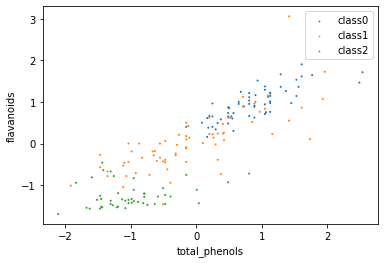

In [122]:
plt.scatter(wine.data[:,5],wine.data[:,6],wine.target == 0,label = 'class0')
plt.scatter(wine.data[:,5],wine.data[:,6],wine.target == 1,label = 'class1')
plt.scatter(wine.data[:,5],wine.data[:,6],wine.target == 2,label = 'class2')
plt.xlabel(wine.feature_names[5])
plt.ylabel(wine.feature_names[6])
plt.legend(loc='best')
plt.show()

In [4]:
x_train, x_valtest, y_train, y_valtest = train_test_split(wine.data, wine.target, test_size=0.2, random_state=95) 
# train데이터와 나머지 8:2로 나눔
x_valid, x_test, y_valid, y_test = train_test_split(x_valtest, y_valtest, test_size=0.5, random_state=95)
# 나머지 데이터 20중에 1:1로 나눔

In [5]:
val_acc = []
val_acc2 = []
for a in range(1, 15):  # knn 알고리즘 하이퍼 파라미터 찾기 위한 작업
    knn = KNeighborsClassifier(n_neighbors=a, metric='manhattan')  #각각 metric중 k값을 바꿔가면서 최적의 값 찾기
    knn2 = KNeighborsClassifier(n_neighbors=a, metric='euclidean')

    knn.fit(x_train, y_train)           #모델 학습
    knn2.fit(x_train, y_train)
    pred_knn1 = knn.predict(x_valid)        #만든 모델을 기반으로 x_valid값으로 예측 진행
    pred_knn2 = knn2.predict(x_valid)
    val_acc.append((pred_knn1 == y_valid).mean())       #예측한 값으로 valid y데이터 값과 비교한 것으로 평균으로 정확도 계산
    val_acc2.append((pred_knn2 == y_valid).mean())

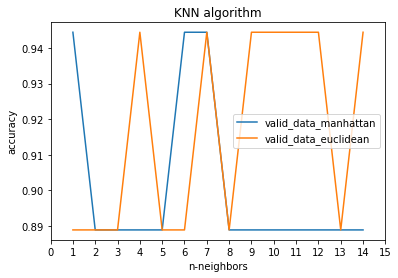

In [6]:
plt.plot(range(1, 15), val_acc, label='valid_data_manhattan')       #하이퍼 파라미터를 찾기 위해 시각화를 하는 과정
plt.plot(range(1, 15), val_acc2, label='valid_data_euclidean')
plt.legend(loc='best')
plt.title("KNN algorithm")
plt.xlabel("n-neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.show()

In [7]:
set_knn = []
X_train = np.concatenate((x_train,x_valid),axis = 0)    #validation 후에 다시 validation과 train data를 합쳐 train data를 만듬
Y_train = np.concatenate((y_train,y_valid),axis = 0) #배열을 옆으로 붙이는 과정이므로 concatenate 사용 (axis는 붙이는 방향 설정)

knn_1 = KNeighborsClassifier(n_neighbors=7, metric='manhattan')     #k = 7 인 파라미터 적용해서 다시 적용해서 학습 진행
knn_2 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_1.fit(X_train, Y_train)
knn_2.fit(X_train, Y_train)

pred = knn_1.predict(x_test)
pred2 = knn_2.predict(x_test)
set_knn.append(knn_1.score(X_train, Y_train))
set_knn.append((pred == y_test).mean())
set_knn.append(knn_2.score(X_train, Y_train))
set_knn.append((pred2 == y_test).mean())

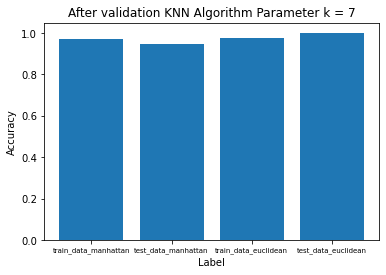

[0.96875, 0.9444444444444444, 0.975, 1.0]


In [8]:
plt.bar(range(0, 4), set_knn)                          #보다 다양한 시각화 자료를 위해 bar 그래프를 사용
plt.title("After validation KNN Algorithm Parameter k = 7")
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.xticks(range(0,4),['train_data_manhattan', 'test_data_manhattan', 'train_data_euclidean', 'test_data_euclidean'], fontsize = 7) 
#라벨을 붙여주는 것
plt.show()
print(set_knn)

In [9]:
val_acc_tree = []       #decision tree gini를 사용한 validation 정확도를 저장하기 위한 배열
val_acc_tree_entropy = []   #entropy를 사용한 validation 정확도 측정
for n in range(1,8):        #최적의 max_depth를 찾기 위함
    tree = DecisionTreeClassifier(max_depth=n,criterion = 'gini',random_state=95)
    tree_en = DecisionTreeClassifier(max_depth = n,criterion = 'entropy',random_state=95)
    tree.fit(x_train,y_train)       #모델 학습
    tree_en.fit(x_train,y_train)

    pred_gini = tree.predict(x_valid)       #학습한 모델로 예측 진행
    pred_en = tree_en.predict(x_valid)
    val_acc_tree.append((pred_gini == y_valid).mean())      #예측한 값으로 정확도 측정
    val_acc_tree_entropy.append((pred_en == y_valid).mean())

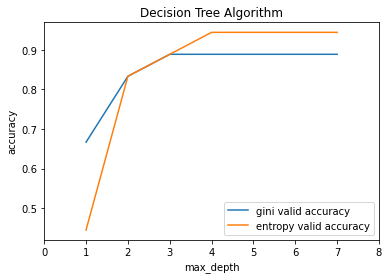

In [10]:
plt.plot(range(1,8),val_acc_tree,label = 'gini valid accuracy')         #하이퍼 파라미터를 찾기 위해 시각화를 통해 찾기
plt.plot(range(1,8),val_acc_tree_entropy,label = 'entropy valid accuracy')
plt.legend(loc='best')
plt.title("Decision Tree Algorithm")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 9, step=1))
plt.show()

In [11]:
tree = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=95)  
# Gini criterion, 위의 과정들을 통해서 찾은 max_depth = 4 적용
tree_entropy = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=95)  # entropy criterion
tree.fit(X_train, Y_train)  # 모델 학습
tree_entropy.fit(X_train, Y_train)

pred_tree = tree.predict(x_test)  # predict 함수 사용해서 test 정확도 예측
pred_tree_entropy = tree_entropy.predict(x_test)
test_acc_gini = (pred_tree == y_test).mean()
test_acc_entropy = (pred_tree_entropy == y_test).mean()

print("gini criterion test accuracy {:.4f}".format(test_acc_gini))
print("entropy criterion test accuracy {:.4f}".format(test_acc_entropy))

gini criterion test accuracy 0.8889
entropy criterion test accuracy 0.7778


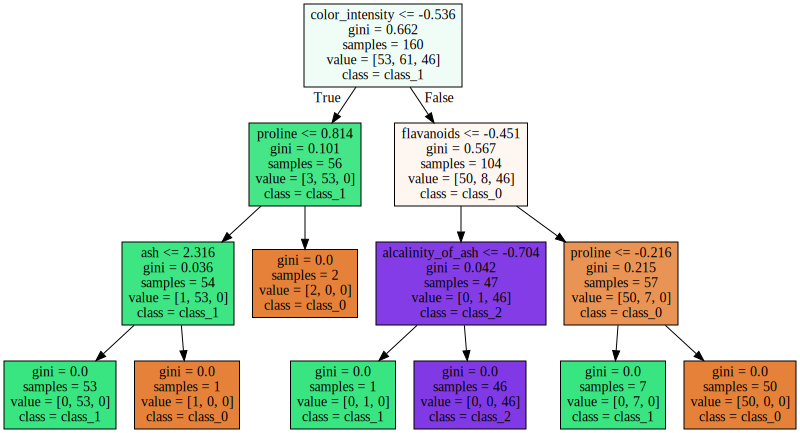

In [12]:
os.environ["PATH"]+=os.pathsep+'C:\Program Files (x86)\Graphviz2.38/bin/'  #환경 변수 path 설정

export_graphviz(tree,out_file='tree_gini.dot',feature_names= wine.feature_names,class_names= wine.target_names,precision=3,filled = True)
#decision Tree를 시각화 하기 위한 graphviz관련 함수 -> dot파일로 만들어줌 각 feature name과 class name 명시, 소숫점 자리수, 색칠여부 명시

with open("tree_gini.dot") as f:   #dot파일을 png로 변환 
    dot_graph = f.read()   #파일 읽어서 변수에 저장
tree_img = graphviz.Source(dot_graph,filename = "tree_gini",format = "png") #png로 변환
tree_img

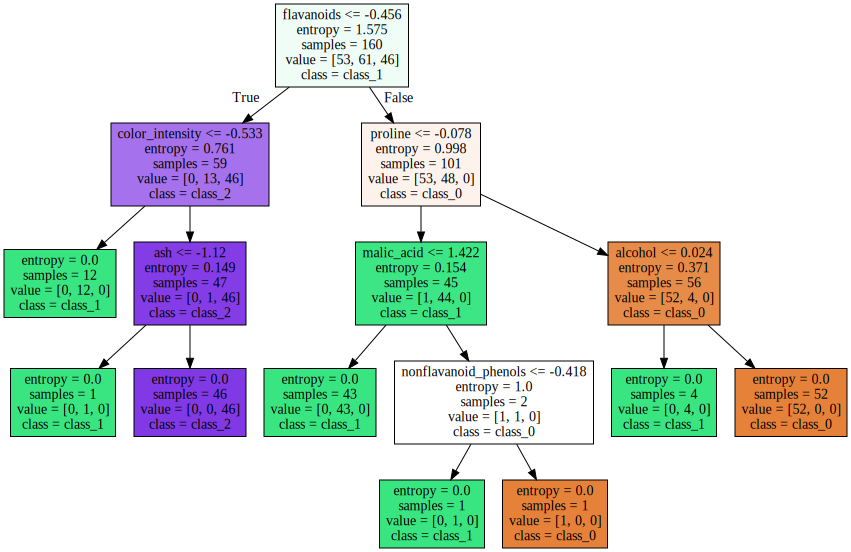

In [13]:
export_graphviz(tree_entropy,out_file = 'tree_entropy.dot',feature_names= wine.feature_names,class_names= wine.target_names,precision = 3,filled = True)

with open("tree_entropy.dot") as f:
    dot_graph = f.read()
tree_entropy_img = graphviz.Source(dot_graph,filename = "tree_entropy",format = "png")
tree_entropy_img

In [14]:
vabg = []
vabe = []
for n in range(1,10):                       #bagging에서는 찾고자 하는 하이퍼 파라미터는 n_estimators이다.
    bagging_gini = BaggingClassifier(tree,n_estimators= n,random_state=95)      #gini criterion tree를 기존 모델로 선정
    bagging = BaggingClassifier(tree_entropy,n_estimators=n,random_state=95)    #entropy criterion tree를 선정
    bagging_gini.fit(x_train,y_train)       #모델 학습
    bagging.fit(x_train,y_train)

    p1 = bagging_gini.predict(x_valid)      #예측 후 정확도 측정
    p2 = bagging.predict(x_valid)
    vabg.append((p1 == y_valid).mean())
    vabe.append((p2 == y_valid).mean())


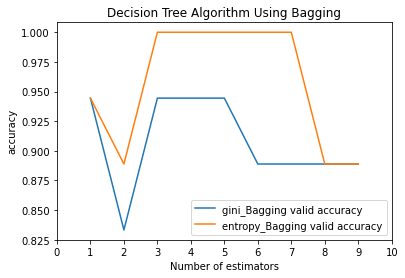

In [15]:
plt.plot(range(1, 10), vabg, label='gini_Bagging valid accuracy')   #시각화 진행
plt.plot(range(1, 10), vabe, label='entropy_Bagging valid accuracy')
plt.legend(loc='best')
plt.title("Decision Tree Algorithm Using Bagging")
plt.xlabel("Number of estimators")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 11, step=1))
plt.show()

In [16]:
bagging_gini = BaggingClassifier(tree,n_estimators=3,random_state=95)           #위에서 찾은 하이퍼 파라미터로 다시 학습 진행
bagging = BaggingClassifier(tree_entropy,n_estimators=3,random_state=95)
bagging.fit(X_train,Y_train)
bagging_gini.fit(X_train,Y_train)

pred_bag_gini = bagging_gini.predict(x_test)
test_acc_bag_gini = (pred_bag_gini == y_test).mean()
pred_bag = bagging.predict(x_test)
test_acc_bag = (pred_bag_gini == y_test).mean()

print(test_acc_bag_gini)
print(test_acc_bag)

0.9444444444444444
0.9444444444444444


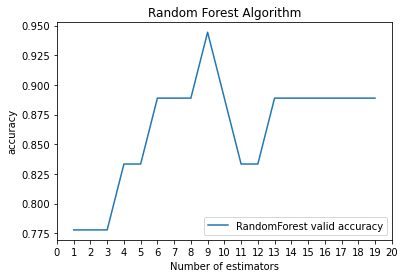

In [17]:
val_acc_RF = []
for n in range(1,20):               #Random Forest 방식도 마찬가지로 최적의 n_estimator를 찾아야함
    forest = RandomForestClassifier(n_estimators=n,random_state=95)
    forest.fit(x_train,y_train)
    prediction = forest.predict(x_valid)
    val_acc_RF.append((prediction == y_valid).mean())

plt.plot(range(1, 20), val_acc_RF, label='RandomForest valid accuracy')         #시각화 진행
plt.legend(loc='best')
plt.title("Random Forest Algorithm")
plt.xlabel("Number of estimators")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 21, step=1))
plt.show()

In [18]:
forest = RandomForestClassifier(n_estimators = 9, random_state= 95)     #찾은 하이퍼 파라미터로 모델 학습 재 진행(retrain)
forest.fit(X_train,Y_train)
prediction = forest.predict(x_test)
test_acc_forest = (prediction == y_test).mean()

print("test accuracy Random Forest",test_acc_forest)


test accuracy Random Forest 0.9444444444444444


test accuracy Random Forest using 9 estimators : 0.9444444444444444
test accuracy Bagging using 9 estimators : 1.0
test accuracy Random Forest using 3 estimators : 0.9444444444444444
test accuracy Bagging using 3 estimators : 0.9444444444444444


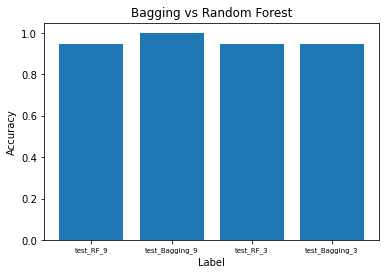

In [19]:
arr = []  # bagging과 random forest가 각각의 최적의 하이퍼 파라미터가 다르므로 각각 비교하기 위함
bagging = BaggingClassifier(tree_entropy,n_estimators=9,random_state=95)
bagging.fit(X_train,Y_train)
pred_bagging = bagging.predict(x_test)
test_acc_bagging_nine = (pred_bagging == y_test).mean()

print("test accuracy Random Forest using 9 estimators :",test_acc_forest)
print("test accuracy Bagging using 9 estimators :",test_acc_bagging_nine)
arr.append(test_acc_forest)
arr.append(test_acc_bagging_nine)
forest = RandomForestClassifier(n_estimators = 3, random_state= 95)     #찾은 하이퍼 파라미터로 모델 학습 재 진행(retrain)
forest.fit(X_train,Y_train)
prediction = forest.predict(x_test)
test_acc_forest = (prediction == y_test).mean()

print("test accuracy Random Forest using 3 estimators :",test_acc_forest)
print("test accuracy Bagging using 3 estimators :",test_acc_bag)
arr.append(test_acc_forest)
arr.append(test_acc_bag)

plt.bar(range(0, 4), arr)                          #보다 다양한 시각화 자료를 위해 bar 그래프를 사용
plt.title("Bagging vs Random Forest")
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.xticks(range(0,4),['test_RF_9', 'test_Bagging_9', 'test_RF_3', 'test_Bagging_3'], fontsize = 7) 
#라벨을 붙여주는 것
plt.show()



In [20]:
val_acc_NSVM =[]
val_acc_LSVM = []
val_acc_RSVM = []
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]  #비교할 C값을 미리 배열로 설정
for n in range(0,8):               #SVM 방법은 linear, nonlinear(poly, rbf)로 진행, 하이퍼 파라미터는 C
    linear_SVM = SVC(kernel='linear', C=param_range[n], random_state=95)  #C값 비교
    linear_SVM.fit(x_train, y_train)
    pred_LSVM = linear_SVM.predict(x_valid)
    val_acc_LSVM.append((pred_LSVM == y_valid).mean())

    Poly_SVM = SVC(kernel='poly', C=param_range[n], random_state=95)
    Poly_SVM.fit(x_train, y_train)
    pred_NSVM = Poly_SVM.predict(x_valid)
    val_acc_NSVM.append((pred_NSVM == y_valid).mean())

    RBF_SVM = SVC(kernel='rbf', C=param_range[n], random_state=95)
    RBF_SVM.fit(x_train, y_train)
    pred_RSVM = RBF_SVM.predict(x_valid)
    val_acc_RSVM.append((pred_RSVM == y_valid).mean())

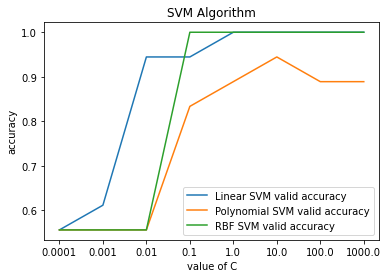

In [21]:
plt.plot(range(0, 8), val_acc_LSVM, label='Linear SVM valid accuracy')     #시각화 진행
plt.plot(range(0, 8), val_acc_NSVM, label='Polynomial SVM valid accuracy')
plt.plot(range(0, 8), val_acc_RSVM, label='RBF SVM valid accuracy')
plt.legend(loc='best')
plt.title("SVM Algorithm")
plt.xlabel("value of C")
plt.ylabel("accuracy")
plt.xticks(range(0,8),param_range)
plt.show()

In [22]:
linear_SVM = SVC(kernel='linear', C=1.0, random_state=95)         #찾은 하이퍼 파라미터로 retrain 진행 후 정확도 측정
Poly_SVM = SVC(kernel='poly', C=10.0, random_state=95)
RBF_SVM = SVC(kernel='rbf', C=0.1, random_state=95)

linear_SVM.fit(X_train,Y_train)    #모델 학습
pred_LSVM = linear_SVM.predict(x_test) #predict로 모델 예측
test_acc_LSVM = (pred_LSVM == y_test).mean()  #정확도 측정

Poly_SVM.fit(X_train,Y_train)
pred_PSVM = Poly_SVM.predict(x_test)
test_acc_PSVM = (pred_PSVM == y_test).mean()

RBF_SVM.fit(X_train,Y_train)
pred_RSVM = RBF_SVM.predict(x_test)
test_acc_RSVM = (pred_RSVM == y_test).mean()

print(test_acc_LSVM)
print(test_acc_PSVM)
print(test_acc_RSVM)


1.0
0.9444444444444444
1.0


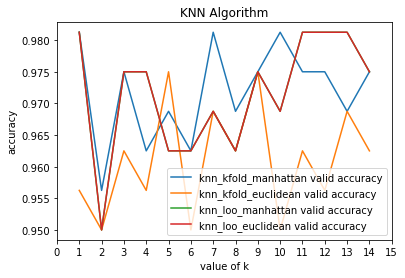

In [46]:
knn_kfold_man = []
knn_kfold_euc = []
knn_loo_man = []
knn_loo_euc = []
loo = LeaveOneOut()
for k in range(1,15):     #knn cross validation 비교 분석
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'manhattan')
    knn2 = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    
    scores = cross_val_score(knn,X_train,Y_train,scoring = 'accuracy',cv = 10)
    scores2 = cross_val_score(knn2,X_train,Y_train,scoring = 'accuracy',cv = 10)
    
    scores3 = cross_val_score(knn,X_train,Y_train,scoring = 'accuracy',cv =loo)
    scores4 = cross_val_score(knn,X_train,Y_train,scoring = 'accuracy',cv = loo)
    
    knn_kfold_man.append(scores.mean())
    knn_kfold_euc.append(scores2.mean())
    knn_loo_man.append(scores3.mean())
    knn_loo_euc.append(scores4.mean())
    
plt.plot(range(1, 15), knn_kfold_man, label='knn_kfold_manhattan valid accuracy')     #시각화 진행
plt.plot(range(1, 15), knn_kfold_euc, label='knn_kfold_euclidean valid accuracy')
plt.plot(range(1, 15), knn_loo_man, label='knn_loo_manhattan valid accuracy') 
plt.plot(range(1, 15), knn_loo_euc, label='knn_loo_euclidean valid accuracy') 
plt.legend(loc='best')
plt.title("KNN Algorithm")
plt.xlabel("value of k")
plt.ylabel("accuracy")
plt.xticks(range(0,16))
plt.show()


In [61]:
print(max(knn_kfold_man) )    #나중에 성능이 가장 잘 나온것으로 마지막 학습 진행
print(max(knn_loo_euc)) 


0.98125
0.98125


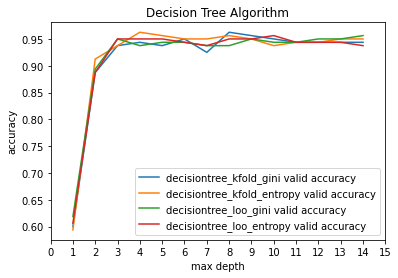

In [48]:
dt_kfold_gini = []
dt_kfold_ent = []
dt_loo_gini = []
dt_loo_ent = []
for k in range(1,15):       #Decision Tree cross validation
    dt_gini = DecisionTreeClassifier(max_depth = k,criterion = 'gini')
    dt_entropy = DecisionTreeClassifier(max_depth = k,criterion = 'entropy')
    
    sc_dt_gini = cross_val_score(dt_gini,X_train,Y_train,scoring = 'accuracy',cv = 10)
    sc_dt_entropy = cross_val_score(dt_entropy,X_train,Y_train,scoring = 'accuracy',cv = 10)
    sc_dt_loo_gini = cross_val_score(dt_gini,X_train,Y_train,scoring = 'accuracy',cv = loo)
    sc_dt_loo_entropy = cross_val_score(dt_entropy,X_train,Y_train,scoring = 'accuracy',cv = loo)
    dt_kfold_gini.append(sc_dt_gini.mean())
    dt_kfold_ent.append(sc_dt_entropy.mean())
    dt_loo_gini.append(sc_dt_loo_gini.mean())
    dt_loo_ent.append(sc_dt_loo_entropy.mean())

    
plt.plot(range(1, 15), dt_kfold_gini, label='decisiontree_kfold_gini valid accuracy')     #시각화 진행
plt.plot(range(1, 15), dt_kfold_ent, label='decisiontree_kfold_entropy valid accuracy')
plt.plot(range(1, 15), dt_loo_gini, label='decisiontree_loo_gini valid accuracy') 
plt.plot(range(1, 15), dt_loo_ent, label='decisiontree_loo_entropy valid accuracy') 
plt.legend(loc='best')
plt.title("Decision Tree Algorithm")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks(range(0,16))
plt.show()
    

In [60]:
print(max(dt_kfold_gini))
print(max(dt_kfold_ent))
print(max(dt_loo_gini))
print(max(dt_loo_ent))

0.9625
0.9625
0.95625
0.95625


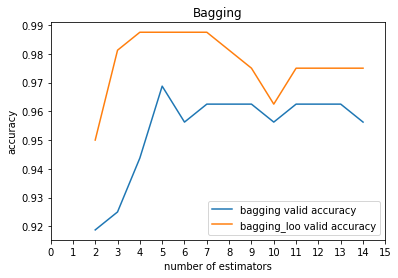

In [70]:
bagging_acc = []
bagging_loo_acc= []

for k in range(2,15):    #bagging cross validation 진행
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth =4,criterion = 'entropy'),n_estimators=k,random_state=95)  
    
    sc_kfold_bag = cross_val_score(bagging,X_train,Y_train,scoring = 'accuracy',cv = 10)
    sc_loo_bag = cross_val_score(bagging,X_train,Y_train,scoring = 'accuracy',cv = loo)
    
    bagging_acc.append(sc_kfold_bag.mean())
    bagging_loo_acc.append(sc_loo_bag.mean())
    
plt.plot(range(2, 15), bagging_acc, label='bagging valid accuracy')  #시각화
plt.plot(range(2, 15), bagging_loo_acc, label='bagging_loo valid accuracy') 
plt.legend(loc='best')
plt.title("Bagging")
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.xticks(range(0,16))
plt.show()

In [71]:
print(max(bagging_acc))
print(max(bagging_loo_acc))

0.96875
0.9875


In [65]:
rf_param_grid = {
    'n_estimators':[5,10,15,20,30],
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split':[2,3,4,5]
}
acc_rf_gs = []
for n in range(2,11):    #random Forest cross validation 진행
    
    rf_gs = GridSearchCV(RandomForestClassifier(random_state = 95),cv = n,param_grid = rf_param_grid,scoring = 'accuracy',n_jobs= -1 )
    rf_gs.fit(X_train,Y_train)
    print(rf_gs.best_params_)
    acc_rf_gs.append(gs.best_score_)
    print(gs.best_score_)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 15}
0.98125
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 15}
0.98125
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
0.98125
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 15}
0.98125
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
0.98125
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
0.98125
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
0.98125
{'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 10}
0.98125
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
0.98125


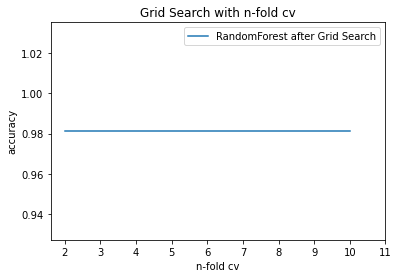

In [66]:
plt.plot(range(2, 11), acc_rf_gs, label='RandomForest after Grid Search')  # 시각화 진행
plt.legend(loc='best')
plt.title("Grid Search with n-fold cv")
plt.xlabel("n-fold cv")
plt.ylabel("accuracy")
plt.xticks(np.arange(2, 12, step=1))
plt.show()

{'svc__C': 0.1, 'svc__kernel': 'linear'}
0.9875
{'svc__C': 0.01, 'svc__kernel': 'linear'}
0.9812485441416259
{'svc__C': 0.1, 'svc__kernel': 'linear'}
0.9875
{'svc__C': 1.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
0.9875
{'svc__C': 0.1, 'svc__kernel': 'linear'}
0.9874169040835707
{'svc__C': 1.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
0.9813664596273292
{'svc__C': 0.1, 'svc__kernel': 'linear'}
0.9875
{'svc__C': 0.01, 'svc__kernel': 'linear'}
0.9811183732752361
{'svc__C': 0.01, 'svc__kernel': 'linear'}
0.98125


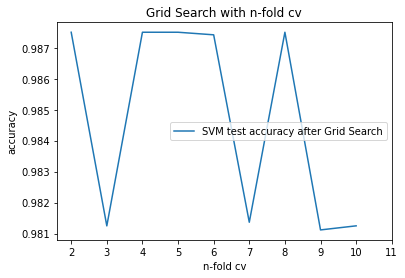

In [51]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'svc__C':param_range,'svc__kernel':['linear']},
    {'svc__C': param_range,'svc__gamma':param_range,'svc__kernel':['poly']},
    {'svc__C': param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}
]
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=95))   #pipeline생성 정규화 포함
acc_gs = []
for n in range(2,11):
    gs = GridSearchCV(pipe_svc,cv = n,param_grid=param_grid,scoring='accuracy')
    gs =gs.fit(X_train,Y_train)
    print(gs.best_params_)
    acc_gs.append(gs.best_score_)
    print(gs.best_score_)

plt.plot(range(2, 11), acc_gs, label='SVM test accuracy after Grid Search')  # 시각화 진행
plt.legend(loc='best')
plt.title("Grid Search with n-fold cv")
plt.xlabel("n-fold cv")
plt.ylabel("accuracy")
plt.xticks(np.arange(2, 12, step=1))
plt.show()

In [50]:
gs = GridSearchCV(pipe_svc,cv = LeaveOneOut(),param_grid=param_grid,scoring='accuracy')   #loo cv로 grid search 진행
gs =gs.fit(X_train,Y_train)
print(gs.best_params_)
print(gs.best_score_)

{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.9875


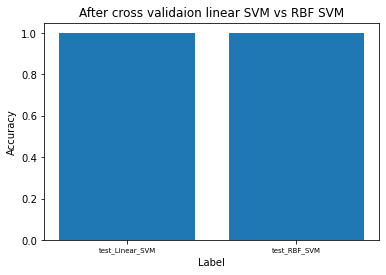

[1.0, 1.0]


In [25]:
linear_F_SVM = SVC(kernel='linear', C=0.1, random_state=95)         #찾은 하이퍼 파라미터로 retrain 진행 후 정확도 측정
RBF_F_SVM = SVC(kernel='linear', gamma = 0.1,C=1.0, random_state=95)         #찾은 하이퍼 파라미터로 retrain 진행 후 정확도 측정

linear_F_SVM.fit(X_train,Y_train)   #모델 retrain 진행
RBF_F_SVM.fit(X_train,Y_train)

pred_F_LSVM = linear_F_SVM.predict(x_test)
pred_F_RSVM = RBF_F_SVM.predict(x_test)

test_acc_F_LSVM = (pred_F_LSVM == y_test).mean()   
test_acc_F_RSVM = (pred_F_RSVM == y_test).mean()

arr2= [] #정확도 기록하기 위한 배열
arr2.append(test_acc_F_LSVM)
arr2.append(test_acc_F_RSVM)

plt.bar(range(0, 2), arr2)                          # bar 그래프를 사용
plt.title("After cross validaion linear SVM vs RBF SVM")
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.xticks(range(0,2),['test_Linear_SVM','test_RBF_SVM'], fontsize = 7) #라벨 붙여주기
plt.show()

print(arr2)